In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None )

In [3]:
df = pd.read_csv('lending_club_loan_two.csv')

loan_amnt: The amount of money that was borrowed in the loan.

term: The length of the loan or repayment period, often given in months (e.g., 36 months or 60 months).

int_rate: The interest rate of the loan, typically expressed as a percentage. This is the rate the borrower has to pay on the loan amount.

installment: The amount that the borrower has to pay periodically (e.g., monthly) to repay the loan, including both principal and interest.

grade: A credit rating or grade assigned to the loan, usually based on the borrower's creditworthiness. Common loan grades might range from 'A' (high creditworthiness) to 'G' (lower creditworthiness).

sub_grade: A more granular rating within the loan grade. For example, an 'A' grade might have sub-grades such as A1, A2, A3, etc., to provide a more detailed assessment.

emp_title: The job title of the borrower, indicating their employment status and profession.

emp_length: The length of time the borrower has been employed, often represented in years.

home_ownership: The borrower's home ownership status. Common values include "RENT," "OWN," or "MORTGAGE," indicating if the borrower rents, owns, or has a mortgage on their home.

annual_inc: The borrower's annual income, often used to assess their ability to repay the loan.

verification_status: Indicates whether the borrower's income and other details have been verified by the lending institution. Common values might be "Verified," "Source Verified," or "Not Verified."

issue_d: The date when the loan was issued or funded.

loan_status: The current status of the loan, such as "Current" (being paid as scheduled), "Fully Paid" (completed), "Charged Off" (defaulted), or "Late."

purpose: The stated reason or purpose for which the borrower is taking the loan, such as "debt consolidation," "credit card refinancing," "home improvement," etc.

title: The loan title, which might be similar to the purpose field but could include custom information provided by the borrower.

dti: Debt-to-Income ratio, which represents the borrower's monthly debt payments as a percentage of their monthly income. This is a key indicator of financial health.

earliest_cr_line: The date of the borrower's earliest credit line or account, used to assess the borrower's credit history length.

open_acc: The number of open credit accounts the borrower currently has.

pub_rec: The number of derogatory public records associated with the borrower, such as bankruptcies, tax liens, or judgments.

revol_bal: The borrower's revolving credit balance, which refers to the amount of debt they currently have on credit cards or other revolving accounts.

revol_util: Revolving credit utilization, expressed as a percentage. It shows how much of the borrower's available credit they are currently using.

total_acc: The total number of credit accounts the borrower has had over their lifetime.

initial_list_status: The initial status of the loan listing, which might indicate whether the loan was listed for investors to fund (e.g., "F" for funding).

application_type: Whether the application was individual or joint. For example, "Individual" or "Joint" applications, indicating whether one or multiple applicants are responsible for the loan.

mort_acc: The number of mortgage accounts the borrower holds.

pub_rec_bankruptcies: The number of public record bankruptcies filed by the borrower.

address: The address of the borrower. This might be partially anonymized for privacy reasons.

In [4]:
df.head(5)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [5]:
df.shape

(396030, 27)

In [6]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [8]:
df.loan_status.value_counts(dropna=False) # loan status tells whether cutomer paid loan or not.

loan_status
Fully Paid     318357
Charged Off     77673
Name: count, dtype: int64

In [9]:
df['loan_status'] = df['loan_status'].map({'Fully Paid':1 ,'Charged Off':0}) # converting to numerical data

<Axes: xlabel='loan_status', ylabel='count'>

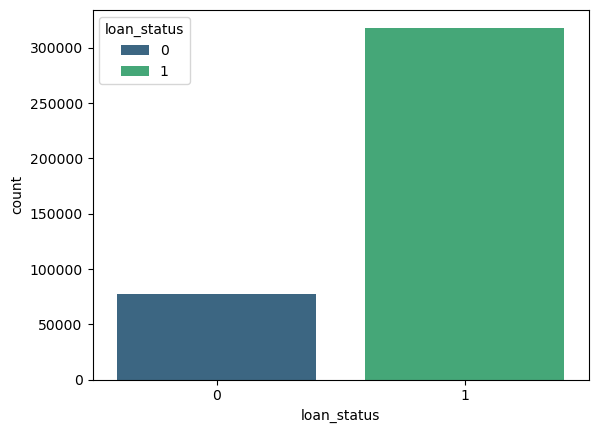

In [10]:
sns.countplot(x='loan_status',data=df, hue = 'loan_status', palette='viridis')

In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
loan_status,396030.0,0.803871,0.397068,0.00,1.00,1.00,1.00,1.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30


In [12]:
df.corr(numeric_only=True)

,loan_amnt,int_rate,installment,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,-0.059836,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,-0.247758,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,-0.041082,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,0.053432,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
loan_status,-0.059836,-0.247758,-0.041082,0.053432,1.000000,-0.062413,-0.028012,-0.019933,0.010892,-0.082373,0.017893,0.073111,-0.009383
dti,0.016636,0.079038,0.015786,-0.081685,-0.062413,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,-0.028012,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.019933,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.010892,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,-0.082373,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751


<Axes: >

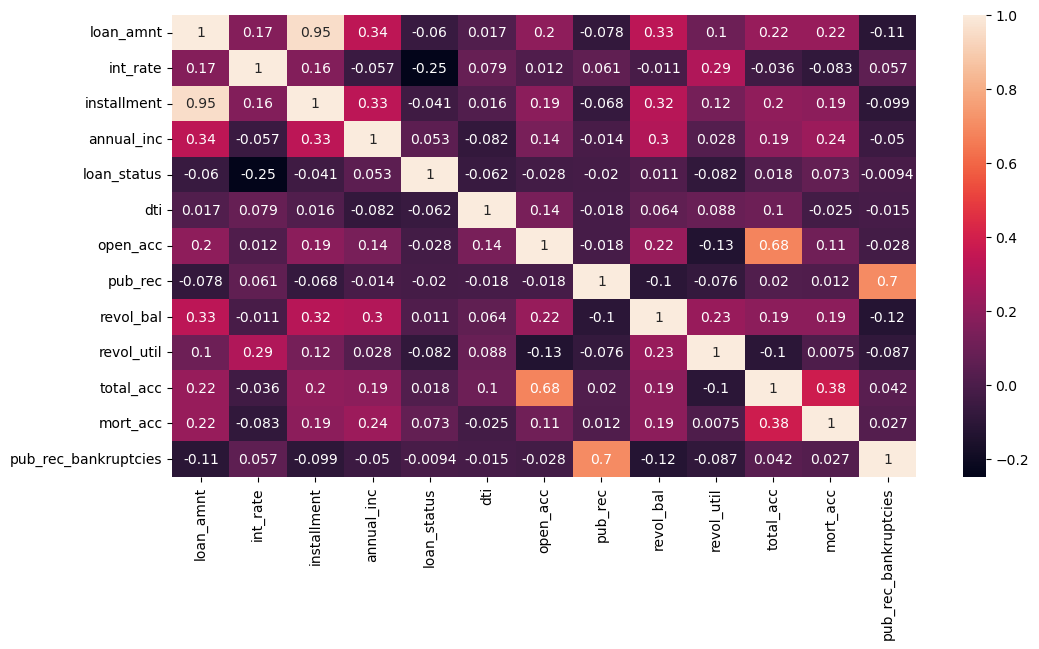

In [13]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [14]:
df.corr(numeric_only=True)['loan_status'] #We can see there are no features which are highly correlated.

loan_amnt              -0.059836
int_rate               -0.247758
installment            -0.041082
annual_inc              0.053432
loan_status             1.000000
dti                    -0.062413
open_acc               -0.028012
pub_rec                -0.019933
revol_bal               0.010892
revol_util             -0.082373
total_acc               0.017893
mort_acc                0.073111
pub_rec_bankruptcies   -0.009383
Name: loan_status, dtype: float64

<Axes: xlabel='loan_amnt', ylabel='Count'>

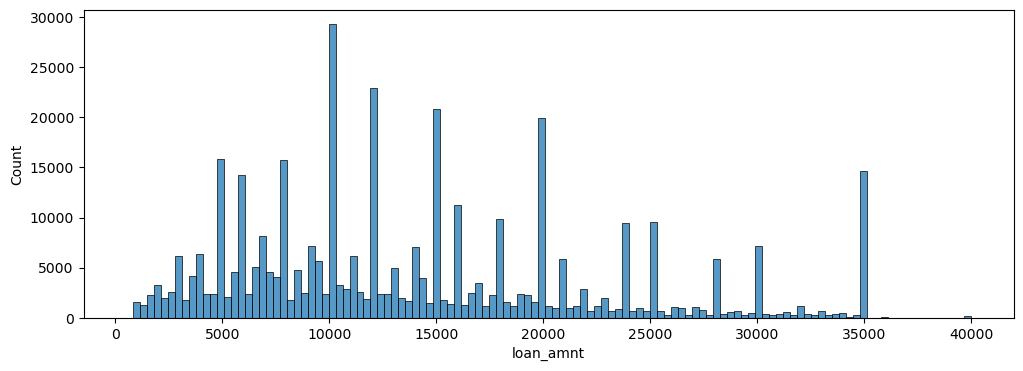

In [15]:
plt.figure(figsize=(12,4))
sns.histplot(df['loan_amnt'])

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

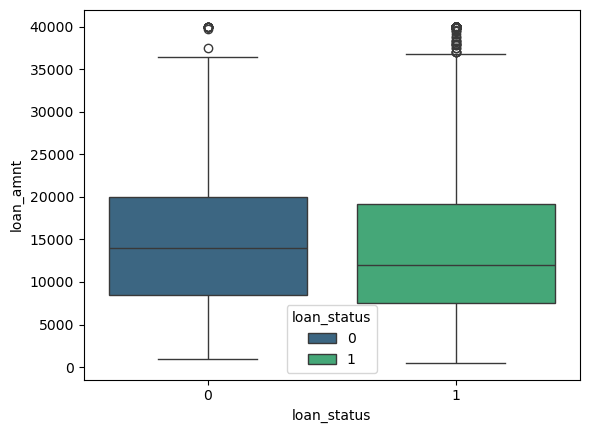

In [16]:
sns.boxplot(x='loan_status',y='loan_amnt',hue = 'loan_status', data=df, palette='viridis') #We can see there are outliers

In [17]:
df.groupby(df['loan_status'])['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
1,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [18]:
df['term'] #We will extract the numeric part

0          36 months
1          36 months
2          36 months
3          36 months
4          60 months
             ...    
396025     60 months
396026     36 months
396027     36 months
396028     60 months
396029     36 months
Name: term, Length: 396030, dtype: object

In [19]:
df['term'] = df['term'].apply(lambda term: int(term[:3]))

In [20]:
df['term'].head()

0    36
1    36
2    36
3    36
4    60
Name: term, dtype: int64

In [21]:
df.grade.unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [22]:
sorted(df['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

<Axes: xlabel='grade', ylabel='count'>

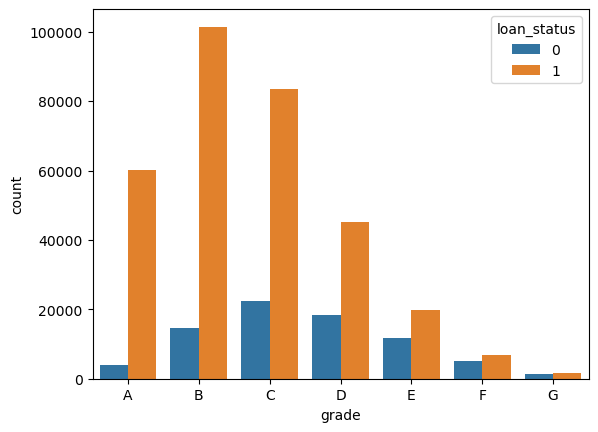

In [23]:
sns.countplot(x='grade',data=df,hue='loan_status',order=['A','B',"C",'D',"E",'F','G'])

<Axes: xlabel='sub_grade', ylabel='count'>

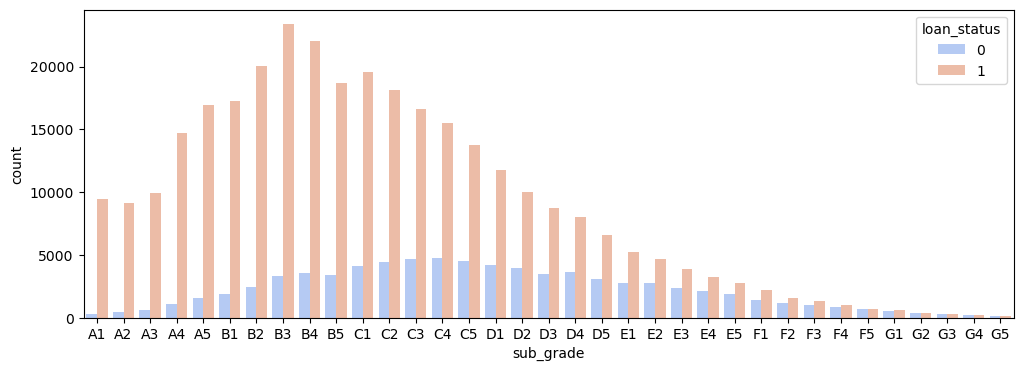

In [24]:
plt.figure(figsize=(12,4))
sns.countplot(x='sub_grade',data=df, hue = 'loan_status', order=sorted(df['sub_grade'].unique()),palette='coolwarm')

<Axes: >

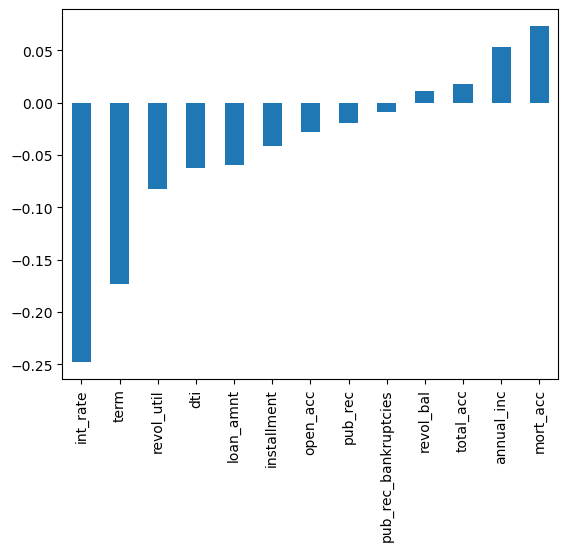

In [25]:
df.corr(numeric_only=True)['loan_status'].sort_values().drop(['loan_status']).plot(kind='bar')

Data Pre-Processing

In [26]:
df.emp_title.nunique()

173105

In [27]:
df.emp_title.value_counts()

emp_title
Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: count, Length: 173105, dtype: int64

In [28]:
df.drop('emp_title',axis=1, inplace=True) #There are many emp titles we will delete this column, these cannot be categorized and doesnt provide much insight in prediction

In [29]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [30]:
sorted_emp_length = ['< 1 year','1 year','2 years','3 years','4 years','5 years','6 years','7 years','8 years','9 years','10+ years'
 ]

<Axes: xlabel='emp_length', ylabel='count'>

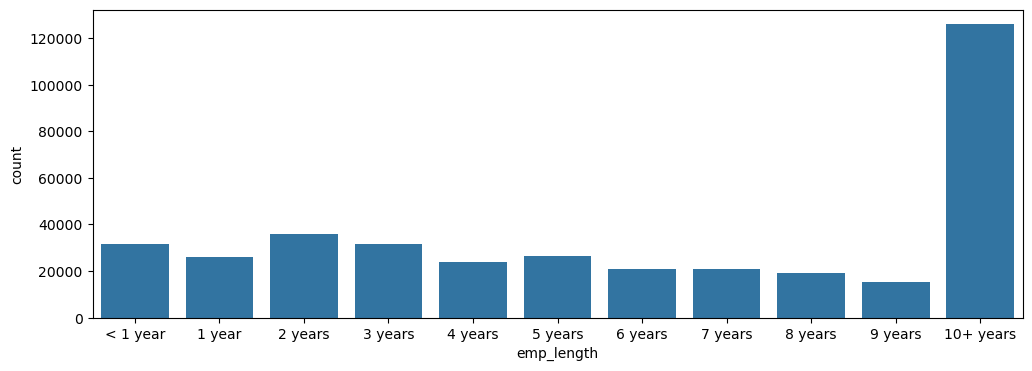

In [31]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',data=df,order=sorted_emp_length)

<Axes: xlabel='emp_length', ylabel='count'>

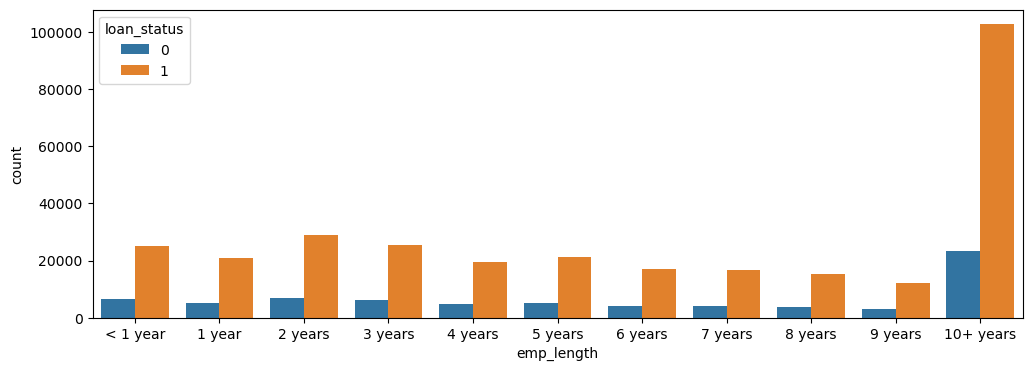

In [32]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',data=df,order=sorted_emp_length,hue='loan_status')

In [33]:
emp_charged_off = df[(df['loan_status']==0)].groupby('emp_length').count()['loan_status']

In [34]:
emp_fully_paid = df[(df['loan_status']==1)].groupby('emp_length').count()['loan_status']

In [35]:
emp_percentage = emp_charged_off/(emp_fully_paid+emp_charged_off)

In [36]:
emp_percentage

emp_length
1 year       0.199135
10+ years    0.184186
2 years      0.193262
3 years      0.195231
4 years      0.192385
5 years      0.192187
6 years      0.189194
7 years      0.194774
8 years      0.199760
9 years      0.200470
< 1 year     0.206872
Name: loan_status, dtype: float64

<Axes: xlabel='emp_length'>

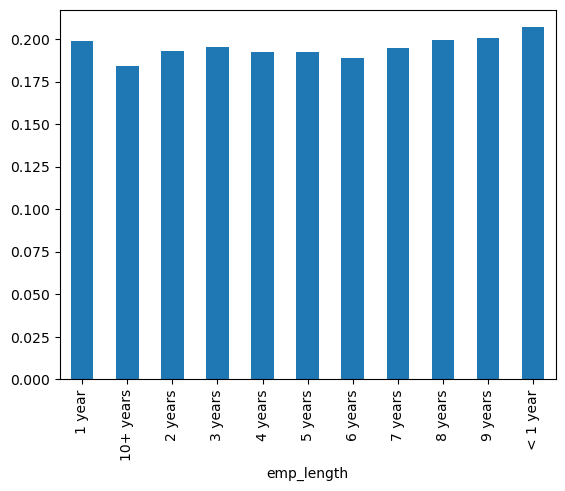

In [37]:
emp_percentage.plot(kind='bar')

In [38]:
df=df.drop('emp_length',axis=1) #Charge off rates are extremely similar across all employment lengths, So we delete the employee length column


In [39]:
df.isnull().sum()


loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [40]:
df['title'].head(10) #we are dealing with the columns which have huge missing data

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

In [41]:
df['title'].nunique()

48816

In [42]:
df['purpose'].head(10) # Purpose and Title information are kind of similar

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [43]:
df['purpose'].nunique()

14

In [44]:
df.drop('title',axis=1, inplace=True) #As this is just a description of the purpose column we can delete title column

In [45]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [46]:
df['mort_acc'].value_counts() #The number of mortgage accounts the borrower holds.

mort_acc
0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: count, dtype: int64

In [47]:
df.corr(numeric_only=True)['mort_acc']

loan_amnt               0.222315
term                    0.096220
int_rate               -0.082583
installment             0.193694
annual_inc              0.236320
loan_status             0.073111
dti                    -0.025439
open_acc                0.109205
pub_rec                 0.011552
revol_bal               0.194925
revol_util              0.007514
total_acc               0.381072
mort_acc                1.000000
pub_rec_bankruptcies    0.027239
Name: mort_acc, dtype: float64

In [48]:
#It has a good co-relation with total accounts

total_acc_avg = df.groupby('total_acc').mean(numeric_only=True)['mort_acc']

In [49]:
total_acc_avg

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [50]:
# Filling the missing data according to the ratio based on the above cell
def fill_mort_acc_value(total_acc,mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [51]:
#applying the above data to our dataset
df['mort_acc'] = df.apply(lambda x: fill_mort_acc_value(x['total_acc'],x['mort_acc']),axis=1)

In [52]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
dtype: int64

In [53]:
#Since the missing data is very small in number, we can drop the values of that particular feature
df = df.dropna()

In [54]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

Categorical Variables and Dummy Variables

In [55]:
df.select_dtypes(['object']).columns

Index(['grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [56]:
#We already know that grade is a part of subgrade, So we will delete the column
df=df.drop('grade',axis=1)

In [57]:
dummies = pd.get_dummies(df['sub_grade'],drop_first=True)
df=pd.concat([df.drop('sub_grade',axis=1),dummies],axis=1)

In [58]:
dummies = pd.get_dummies(df[['verification_status','initial_list_status','application_type','purpose']],drop_first=True)
df=pd.concat([df.drop(['verification_status','initial_list_status','application_type','purpose'],axis=1),dummies],axis=1)

In [59]:
df.head()

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,issue_d,loan_status,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,address,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5,verification_status_Source Verified,verification_status_Verified,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,10000.0,36,11.44,329.48,RENT,117000.0,Jan-2015,1,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,8000.0,36,11.99,265.68,MORTGAGE,65000.0,Jan-2015,1,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,15600.0,36,10.49,506.97,RENT,43057.0,Jan-2015,1,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False
3,7200.0,36,6.49,220.65,RENT,54000.0,Nov-2014,1,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False
4,24375.0,60,17.27,609.33,MORTGAGE,55000.0,Apr-2013,0,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False


In [60]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'issue_d', 'loan_status', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'A2', 'A3', 'A4', 'A5',
       'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2',
       'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4',
       'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'initial_list_status_w', 'application_type_INDIVIDUAL',
       'application_type_JOINT', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding'],


In [61]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: count, dtype: int64

In [62]:
df['home_ownership']= df['home_ownership'].replace(['NONE','ANY'],'OTHER')

In [63]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: count, dtype: int64

In [64]:
dummies = pd.get_dummies(df['home_ownership'],drop_first=True)
df=pd.concat([df.drop('home_ownership',axis=1),dummies],axis=1)

In [65]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2',
       'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4',
       'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1',
       'G2', 'G3', 'G4', 'G5', 'verification_status_Source Verified',
       'verification_status_Verified', 'initial_list_status_w',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTHER', 'OWN', 'RENT'],
 

In [66]:
df['address'].head()

0       0174 Michelle Gateway\r\nMendozaberg, OK 22690
1    1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113
2    87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113
3              823 Reid Ford\r\nDelacruzside, MA 00813
4               679 Luna Roads\r\nGreggshire, VA 11650
Name: address, dtype: object

In [67]:
df['address'] = df['address'].apply(lambda address:address[-5:]) #Capturing the pincode

In [68]:
df['address'].value_counts()

address
70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: count, dtype: int64

In [69]:
dummies = pd.get_dummies(df['address'],drop_first=True)
df=pd.concat([df.drop('address',axis=1),dummies],axis=1)

In [70]:
df=df.drop('issue_d',axis=1) #It is the month in which loan is issued, so no use of the column

In [71]:
df['earliest_cr_line'] # It is the date at which the loan was given

0         Jun-1990
1         Jul-2004
2         Aug-2007
3         Sep-2006
4         Mar-1999
            ...   
396025    Nov-2004
396026    Feb-2006
396027    Mar-1997
396028    Nov-1990
396029    Sep-1998
Name: earliest_cr_line, Length: 395219, dtype: object

In [72]:
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda date: int(date[-4:])) #extracting only year

In [73]:
df['earliest_cr_line'].value_counts()

earliest_cr_line
2000    29302
2001    29031
1999    26444
2002    25849
2003    23623
        ...  
1951        3
1950        3
1953        2
1944        1
1948        1
Name: count, Length: 65, dtype: int64

In [74]:
df['earliest_cr_line'].head()

0    1990
1    2004
2    2007
3    2006
4    1999
Name: earliest_cr_line, dtype: int64

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
df.values

array([[10000.0, 36, 11.44, ..., False, False, False],
       [8000.0, 36, 11.99, ..., False, False, False],
       [15600.0, 36, 10.49, ..., False, False, False],
       ...,
       [5000.0, 36, 9.99, ..., True, False, False],
       [21000.0, 60, 15.31, ..., False, False, False],
       [2000.0, 36, 13.61, ..., False, False, False]], dtype=object)

In [77]:
X = df.drop('loan_status',axis=1).values
y=df['loan_status'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [78]:
# For Normalising the data
from sklearn.preprocessing import MinMaxScaler

In [79]:
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [81]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
  Using cached tensorflow-2.17.0-cp312-cp312-win_amd64.whl.metadata (3.2 kB)
  Using cached tensorflow_intel-2.17.0-cp312-cp312-win_amd64.whl.metadata (5.0 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached ml_dtypes-0.4.0-cp312-cp312-win_amd64.whl.metadata (20 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached grpcio-1.66.1-cp312-cp312-win_amd64.whl.metadata (4.0 kB)
  Using cached tensorboard-2.17.1-py3-none-any.whl.metadata (

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [82]:
import tensorflow as tf

In [83]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [84]:
model = Sequential()

model.add(Dense(78,activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(39,activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(19,activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(units=1,activation = 'sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [85]:
from tensorflow.keras.callbacks import EarlyStopping

In [86]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=3)

In [87]:
model.fit(x=X_train,y=y_train,epochs=200,batch_size=256,validation_data=(X_test,y_test), callbacks=[early_stop])

Epoch 1/200
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.3662 - val_loss: 0.2643
Epoch 2/200
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2665 - val_loss: 0.2638
Epoch 3/200
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2645 - val_loss: 0.2627
Epoch 4/200
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2622 - val_loss: 0.2620
Epoch 5/200
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2612 - val_loss: 0.2617
Epoch 6/200
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2600 - val_loss: 0.2619
Epoch 7/200
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2602 - val_loss: 0.2623
Epoch 8/200
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2601 - val_loss: 0.2621
Epoch 8: early stopping


In [97]:
losses = pd.DataFrame(model.history.history)

<Axes: >

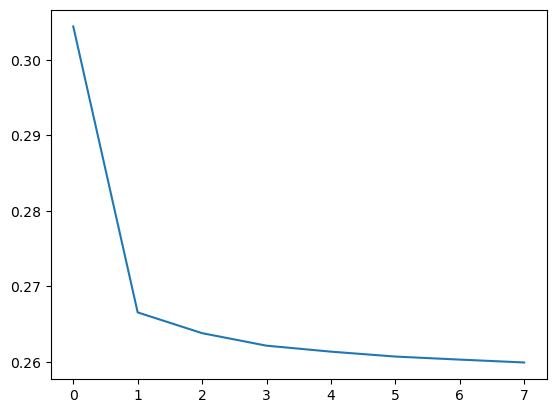

In [98]:
losses['loss'].plot()

In [99]:
from sklearn.metrics import classification_report,confusion_matrix

In [100]:
predictions = (model.predict(X_test) > 0.5).astype(int)

2471/2471 ━━━━━━━━━━━━━━━━━━━━ 2s 831us/step


In [101]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.43      0.60     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.94      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [102]:
confusion_matrix(y_test,predictions)

array([[ 6747,  8911],
       [   23, 63363]], dtype=int64)

In [103]:
import random
random.seed(42)
random_ind = random.randint(0,len(df))
new_customer = df.drop('loan_status',axis=1).iloc[random_ind]
new_customer

loan_amnt      22000.0
term                36
int_rate          6.62
installment     675.49
annual_inc     77431.0
                ...   
30723            False
48052             True
70466            False
86630            False
93700            False
Name: 335936, Length: 78, dtype: object

In [104]:
new_customer = scaler.transform(new_customer.values.reshape(1,78))

In [105]:
(model.predict(new_customer) > 0.5).astype(int)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


array([[1]])

In [106]:
from tensorflow.keras.models import load_model
model.save('Loan_Eligibility_model.h5')